In [1]:
import os; import sys;
from pprint import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils_fancy_example import *
from utils_computation_fancy_example import *
from utils_plot_fancy_example import *

In [2]:
T = 8
N_MIN, N_MAX = 8, 50

In [3]:
DIR_IMAGES = 'images'
DIR_NOTEBOOK_IMG = 'fancy_example'
dest_dir_images = os.path.join(DIR_IMAGES, DIR_NOTEBOOK_IMG)

setup_dir_for_images(dest_dir_images)

full_path_trial = os.path.join(dest_dir_images, f"trial_{N_MIN}_to_{N_MAX}")
setup_dir_for_images(dest_dir_images)

## Rough Explanation

In [4]:
raw_examples()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

In [5]:
raw_examples_v2()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

In [6]:
solve_problem(t=T, verbose=2, whole_solutions=False)

[2 4 6] <class 'numpy.ndarray'>
[2 4 6] <class 'numpy.ndarray'>
[4]
4 2 [4. 2.] 6.0
4 4 [5. 3.] 8.0
append [array([4, 4]), array([5., 3.]), 8]
4 6 [6. 4.] 10.0


array([[array([4, 4]), array([5., 3.]), 8]], dtype=object)

In [7]:
t_attempts = np.arange(N_MIN, N_MAX, 2)
results = []

for t in t_attempts:
    sol = solve_problem(t=t, verbose=0, whole_solutions=True)
    # print(t, sol, len(sol))
    results.append(sol)
    pass

In [8]:
instances_x_result = np.array(list(map(lambda xi: len(xi), results)))
x, y = np.array(list(t_attempts)), instances_x_result

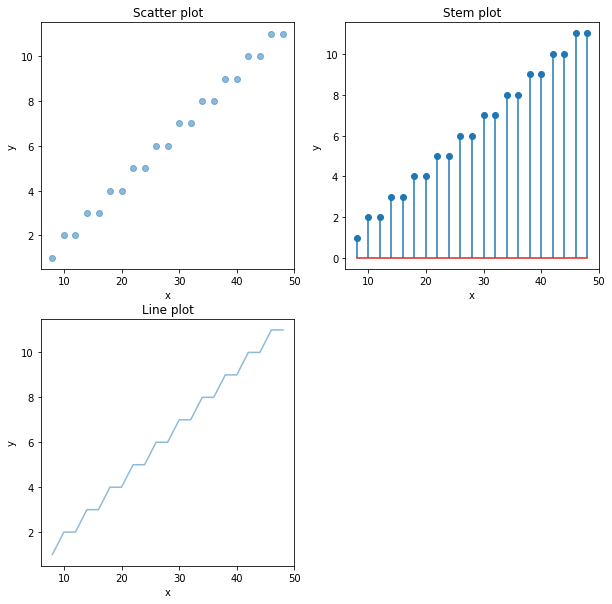

In [9]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

In [10]:
df = create_data_frame(raw_data=results)

In [11]:
# df.head(df.shape[0])
df.head(5)

,x,y,a,b,t
0,5.0,3.0,4.0,4.0,8.0
1,7.0,3.0,8.0,2.0,10.0
2,6.0,4.0,4.0,6.0,10.0
3,8.0,4.0,8.0,4.0,12.0
4,7.0,5.0,4.0,8.0,12.0


In [12]:
n_samples = df.shape[0]
x_vals = df.head(n_samples)[['x']].values
y_vals = df.head(n_samples)[['y']].values

In [13]:
diffs_x_y = x_vals - y_vals
x, y = list(range(len(diffs_x_y))), diffs_x_y

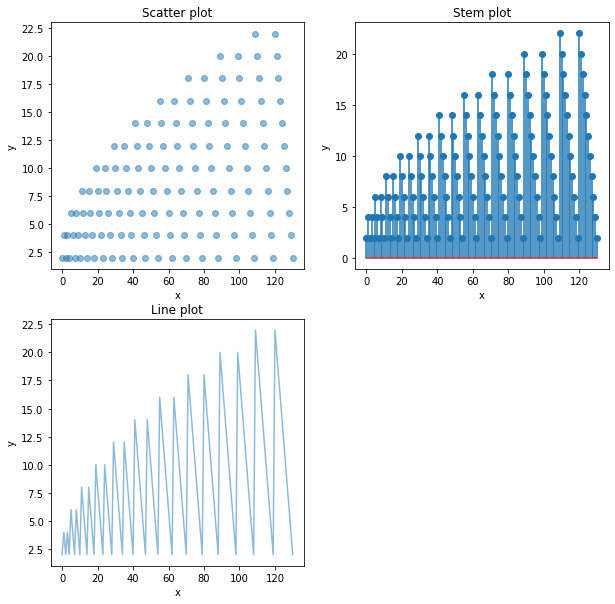

In [14]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

In [15]:
n_samples = df.shape[0]
a_vals = df.head(n_samples)[['a']].values
b_vals = df.head(n_samples)[['b']].values

In [16]:
diffs_a_b = a_vals - b_vals
x, y = list(range(len(diffs_a_b))), diffs_a_b

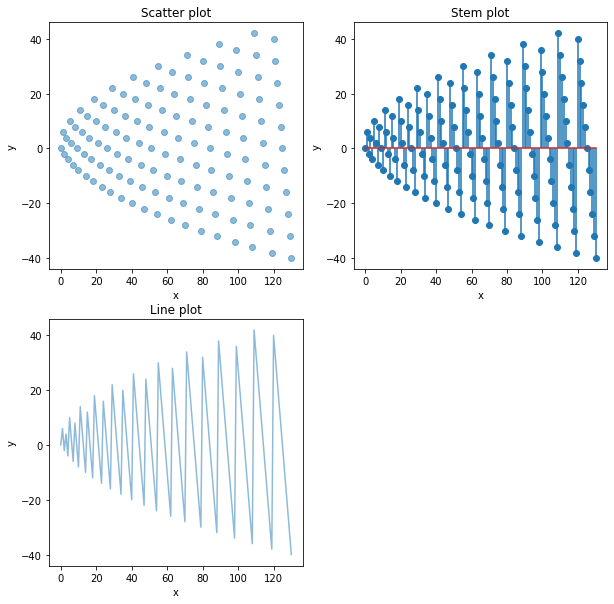

In [17]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))